<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 3.1**

Прочитать пояснения и выполнить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap03.ipynb

В примере с утечкой замените окно Хэмминга одним из окон, предоставляемых NumPy, и посмотрите, как они влияют на утечку См. [http://docs.scipy.org/doc/numpy/reference/routines.window.html](http://docs.scipy.org/doc/numpy/reference/routines.window.html).

**Ход работы**

По представленной ссылке была изучена работа примеров.

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-16 13:38:55--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-16 13:38:55--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-04-16 13:38:56 (4.74 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



Исследуем влияние различных окон на утечку

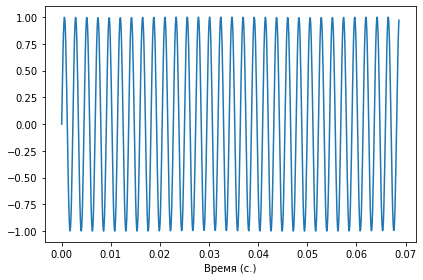

In [7]:
from thinkdsp import SinSignal
import matplotlib.pyplot as plt
import numpy as np
from thinkdsp import decorate

signal = SinSignal(freq=440)
wave = signal.make_wave(signal.period*30.25)
wave.plot()
decorate(xlabel='Время (с.)')

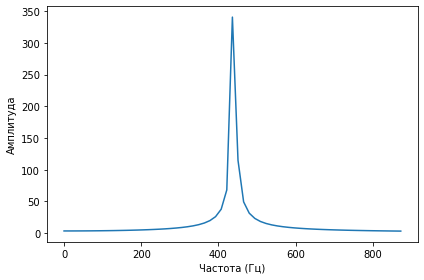

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Частота (Гц)', ylabel='Амплитуда')

Без использования оконных функций можем наблюдать на спектре компоненты, размазанные в диапазоне от 240 до 640 Гц.
Используем различные оконные функции и сравним их.

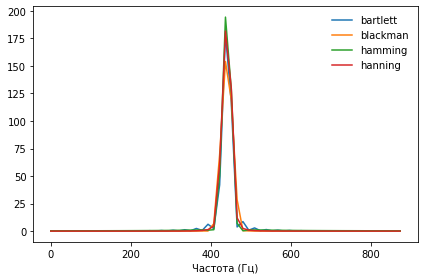

In [9]:
for fun in [np.bartlett, np.blackman, np.hamming, np.hanning]:
  wave = signal.make_wave(signal.period*30.25)
  wave.ys *= fun(len(wave.ys))
  spectrum = wave.make_spectrum()
  spectrum.plot(high=880, label=fun.__name__)

decorate(xlabel='Частота (Гц)')

# **Упражнени 3.2**

Напишите класс, называемый *SawtoothChirp*, расширяющий *Chirp* и переопределяющий *evaluate* для генерации пилообразного сигнала с линейно увеличивающейся (или уменьшающейся) частотой.

Подсказка: надо совместить функции *evaluate* и *Chirp* и *SawtoothSignal*.

Нарисуйте эскиз спектрограммы этого сигнала, а затем распечатайте её. Эффект биений должен быть очевиден, а если сигнал внимательно прослушать, то биения можно и услышать.

**Ход работы**

In [14]:
from thinkdsp import Chirp
from thinkdsp import unbias, normalize
import numpy as np

class SawtoothChirp(Chirp):
  
  def evaluate(self, ts):
    freqs = np.linspace(self.start, self.end, len(ts))
    dts = np.diff(ts, prepend=0)
    dphis = (2 * np.pi) * freqs * dts
    phases = np.cumsum(dphis)
    cycles = phases / (2 * np.pi)
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

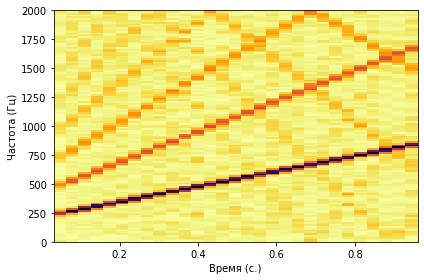

In [15]:
spectogram = wave.make_spectrogram(256)
spectogram.plot()
decorate(xlabel='Время (с.)', ylabel='Частота (Гц)')

# **Упражнение 3.3**

Создайте пилообразный чирп, меняющийся от 2500 до 3000 Гц, и на его основе сгенерируйте сигнал длительностью 1 с. и частотой кадров 20 кГц. Нарисуйте, каким примерно будет *Spectrum*. Затем распечатайте *Spectrum* и посмотрите, правы ли вы.

**Ход работы**


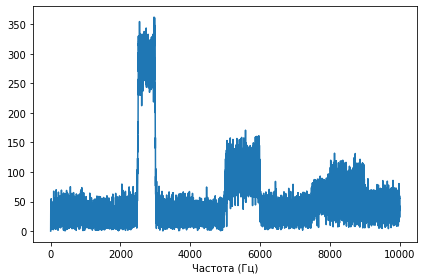

In [17]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_spectrum().plot()
decorate(xlabel='Частота (Гц)')

# **Упражение 3.4**

В музыкальной терминологии *глиссандо* - это нота, меняющаяся от одной высоты до другой, то есть своеобразный чирп.

Найдите или запишите звук глиссандо и распечатайте спектрограмму первых нескольких секунд.

# **Упражнение 3.5**

Тромбонист играет глиссандо, непрерывно дуя в мундштук и двигая кулису тромбона. При этом общая длина трубы меняется, а играемая нота обратно пропорциональна этой длине.

Если предположить, что музыкант двигает кулису с постоянной скоростью, как будет меняться во времени частота?

Напишите класс, называемый *TromboneGliss*, расширяющий *Chirp* и предоставляющий *evaluate*. Создайте сигнал, имитирующий глиссадо на тромбоне от C3 до F3, и обратно до C3. С3 - 262 Гц;
F3 - 349 Гц.

Напечатайте спектрограмму полученного сигнала. На что похоже глиссандо на тромбоне - на линейный или же экспоненциальный чирп?

# **Упражнение 3.6**

Сделайте или найдите запись серии гласных звуков и посмотрите на спектрограммую Сможете ли вы различить разные гласные?